##Import Library yag digunakan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from google.colab import files
import io

##Import Data

In [9]:
filenya = files.upload()

Saving Data Train.csv to Data Train (1).csv


In [11]:
filenya

{'Data Train.csv': b'state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn\nOH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,no\nNJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,no\nOH,84,area_code_408,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no\nOK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no\nMA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no\nMO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no\nLA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,n

In [ ]:
#from google.colab import drive 
#drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data_train = pd.read_csv(io.StringIO(filenya['Data Train.csv'].decode('utf-8')))
data_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


##Statistical Analysis, Exploratory Data Analysis (EDA)
 

In [13]:
print('jumlah data latih:',len(data_train))

jumlah data latih: 4250


In [14]:
#karena akan klasifikasi dengan label kolom churn, maka kita perlu cek apakah labelnya binary (hanya 2 jenis)
#atau multilabel (lebih dari 2 jenis)
data_train['churn'].unique()

array(['no', 'yes'], dtype=object)

<BarContainer object of 2 artists>

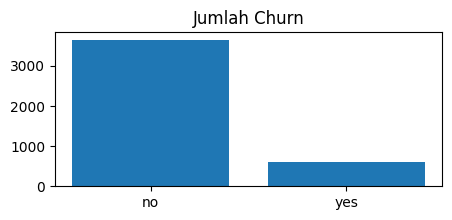

In [15]:
y = data_train['churn'].value_counts()
plt.figure(figsize=(5, 2))
plt.title('Jumlah Churn')
plt.bar(x = y.index, height = y.values)

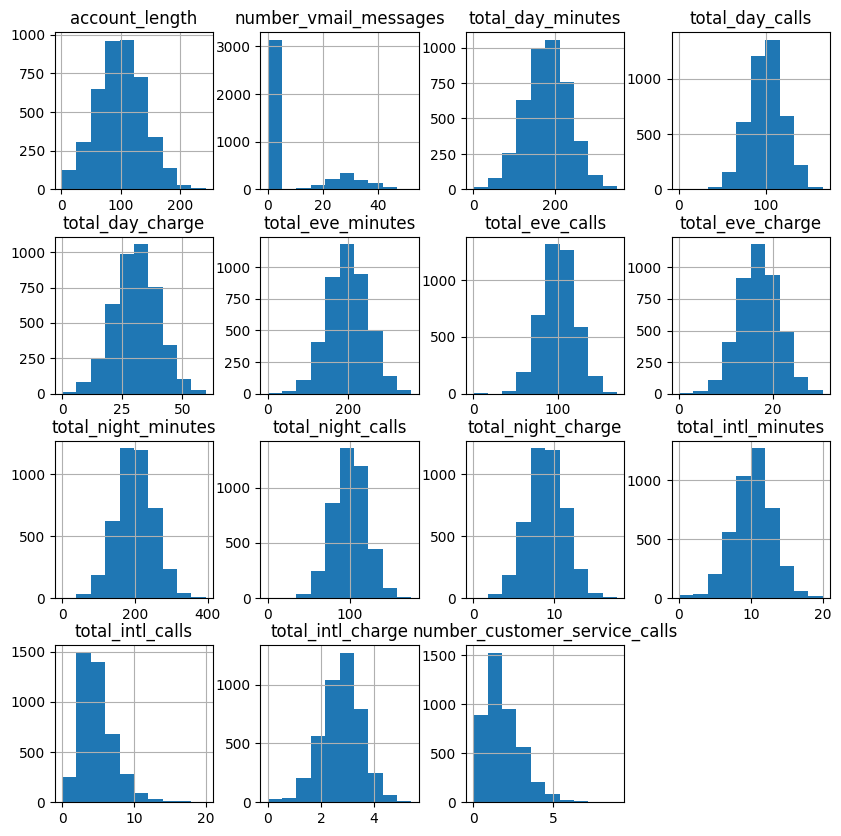

In [16]:
# menampilkan histogram untuk variabel numerik
data_train.hist(bins=10, figsize=(10,10))
plt.show()

<ipython-input-17-b22d7f994e6b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), annot=True)


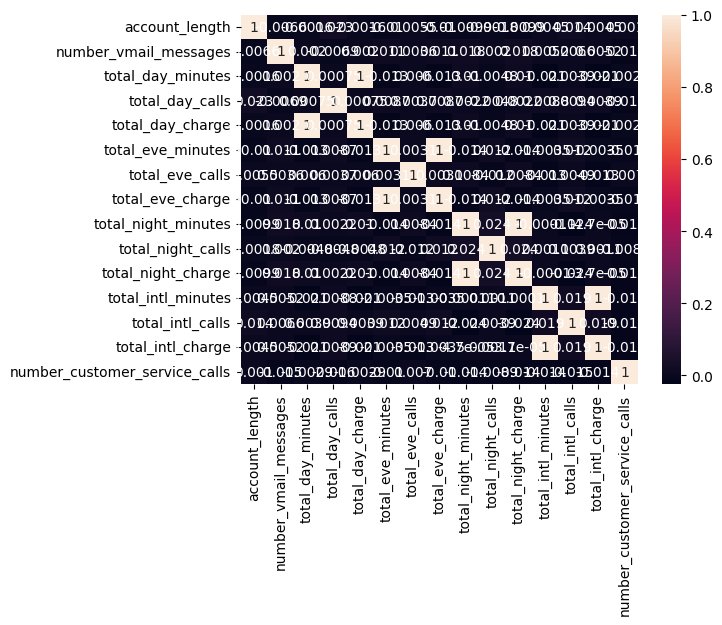

In [17]:
# menampilkan heatmap korelasi antara variabel numerik
import seaborn as sns
sns.heatmap(data_train.corr(), annot=True)
plt.show()

##Preprocessing Dataset

In [18]:
#cek jika ada baris yang bernilai null di semua kolom atribut dan label, jika ada maka buang baris tersebut
data_train.isnull().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [19]:
# Drop column yang tidak dipakai
data_train = data_train.drop(columns=['state', 'account_length'], axis=1)

In [20]:
data_train = pd.get_dummies(data_train, columns=['area_code', 'international_plan', 'voice_mail_plan'], drop_first=True)

In [21]:
X = data_train.drop('churn', axis=1)
y = data_train['churn']

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

# Melakukan feature selection dengan chi-square
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

# Menampilkan fitur terbaik
mask = selector.get_support() # Mengambil mask boolean fitur terbaik
new_features = X.columns[mask] # Mengambil nama kolom yang menjadi fitur terbaik
print(new_features)

Index(['number_vmail_messages', 'total_day_minutes', 'total_day_charge',
       'total_eve_minutes', 'total_eve_charge', 'total_night_minutes',
       'total_intl_minutes', 'number_customer_service_calls',
       'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')


In [23]:
X = X[new_features]
X_test = data_train[new_features]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Membuat Model Machine Learning

####Decision Tree Classifier

Akurasi model Decision Tree Classifier: 0.9
              precision    recall  f1-score   support

          no       0.95      0.93      0.94       721
         yes       0.65      0.73      0.69       129

    accuracy                           0.90       850
   macro avg       0.80      0.83      0.81       850
weighted avg       0.91      0.90      0.90       850



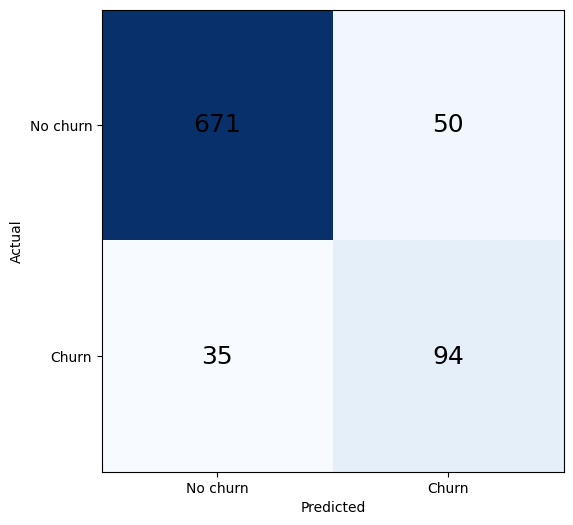

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# inisiasi model
model_dt = DecisionTreeClassifier(random_state=42)

# training model
model_dt.fit(X_train, y_train)

# prediksi pada data test
y_pred_dt = model_dt.predict(X_test)

# evaluasi model
print("Akurasi model Decision Tree Classifier:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=18)
plt.show()


####Random Forest Classifier

Akurasi model Random Forest Classifier: 0.9494117647058824
              precision    recall  f1-score   support

          no       0.95      0.99      0.97       721
         yes       0.91      0.74      0.82       129

    accuracy                           0.95       850
   macro avg       0.93      0.86      0.89       850
weighted avg       0.95      0.95      0.95       850



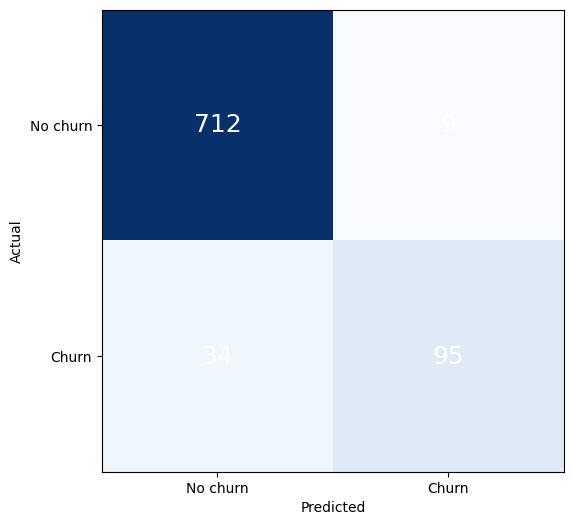

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# inisiasi model
model_rf = RandomForestClassifier(random_state=42)

# training model
model_rf.fit(X_train, y_train)

# prediksi pada data test
y_pred_rf = model_rf.predict(X_test)

# evaluasi model
print("Akurasi model Random Forest Classifier:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

###KNN

Akurasi model KNN: 0.8988235294117647
              precision    recall  f1-score   support

          no       0.90      0.99      0.94       721
         yes       0.88      0.39      0.54       129

    accuracy                           0.90       850
   macro avg       0.89      0.69      0.74       850
weighted avg       0.90      0.90      0.88       850



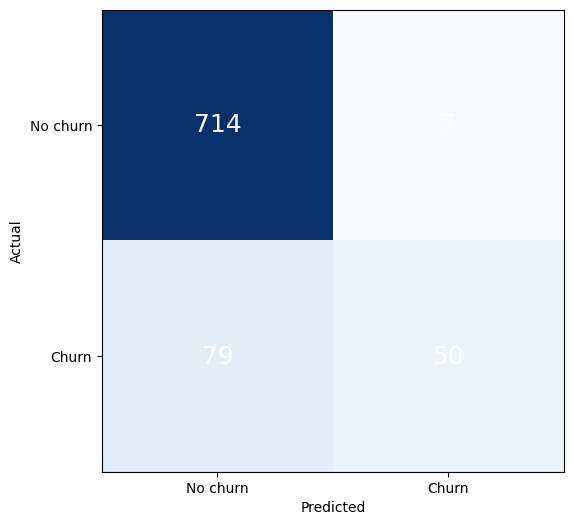

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# inisiasi model
model_knn = KNeighborsClassifier()

# training model
model_knn.fit(X_train, y_train)

# prediksi pada data test
y_pred_knn = model_knn.predict(X_test)

# evaluasi model
print("Akurasi model KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

###SVM

Akurasi model SVM: 0.8552941176470589
              precision    recall  f1-score   support

          no       0.85      1.00      0.92       721
         yes       1.00      0.05      0.09       129

    accuracy                           0.86       850
   macro avg       0.93      0.52      0.51       850
weighted avg       0.88      0.86      0.80       850



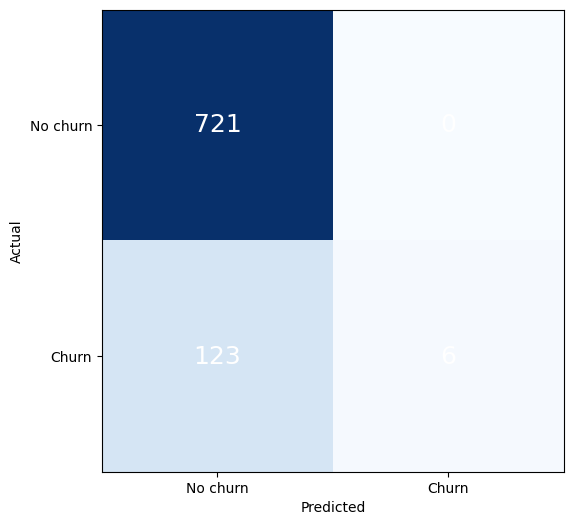

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# inisiasi model
model_svm = SVC()

# training model
model_svm.fit(X_train, y_train)

# prediksi pada data test
y_pred_svm = model_svm.predict(X_test)

# evaluasi model
print("Akurasi model SVM:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No churn', 'Churn'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Decision Tree Classifier: 90.00%
Akurasi Random Forest Classifier: 94.94%
Akurasi Logistic Regression: 84.47%
Akurasi Support Vector Machine: 85.53%


##Predict

In [30]:
filenya = files.upload()

Saving Data Test.csv to Data Test.csv


In [32]:
data_test = pd.read_csv(io.StringIO(filenya['Data Test.csv'].decode('utf-8')))
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [33]:
# prediksi pada data_test
y_pred_test = model_rf.predict(X_test)
y_pred_test = y_pred_test[:len(data_test)]
# tampilkan hasil prediksi
print(y_pred_test)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no

In [ ]:
# simpan hasil prediksi ke dalam file CSV
data_test['churn'] = y_pred_test
data_test.to_csv('/content/drive/MyDrive/DataScience/Hasil Predict Data Test.csv', index=True)